## Importing Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Actual Amino Acid Variants

In [32]:
actual = pd.read_csv('/Users/kimwilliame/Git/hiv/test_data/minvar_mix_panel.txt', index_col=(0,1))
actual

JRCSF YU2 INP0223 INP0224 INP0157
GENE POS                                  
PR   10      -   -       F       -       -
     13      -   -       V       -       -
     16      -   -       A       -       -
     32      -   -       I       -       -
     33      -   -       F       -       -
...        ...  ..     ...     ...     ...
RT   277     -   R       R       -       R
     293     -   -       V       V       V
     297     K   -       -       A       -
     322     -   -       -       W       W
     327     V   -       -       -       -

[63 rows x 5 columns]

In [33]:
# Function to calculate metrics
def calculate_metrics(aligner, ground_truth, predicted_data, join_type="outer"):
    # Merge ground truth and predicted data on GENE and POS
    merged_data = pd.merge(ground_truth, predicted_data, left_index=True, right_index=True, how=join_type)
    merged_data.fillna('-', inplace=True)

    # print(merged_data)
    
    # Initialize counts
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    
    # Iterate through rows
    for index, row in merged_data.iterrows():
        is_nan = True
        expected = [row[col] for col in ground_truth.columns if col != 'ALT']
        if row['ALT'] != '-':
            if row['ALT'] in expected:
                TP += 1
            else:
                FP += 1
        else:
            if expected.count('-') == len(expected):
                TN += 1
            else:
                FN += 1
        # for col in ground_truth.columns:
        #     # put content of col in array of strings
        #     if col != 'ALT':
        #         # If ground truth is not '-', check if prediction matches
        #         if row[col] != '-':
        #             if row['ALT'] == row[col]:
        #                 TP += 1
        #             else:
        #                 FN += 1
        #             is_nan = False
        #             break
        # # If ground truth is '-', check if prediction is also '-'
        # if is_nan:
        #     if row['ALT'] == '-':
        #         TN += 1
        #     else:
        #         FP += 1

    # print(f"Aligner: {aligner}")
    # print("TP: " + str(TP))
    # print("TN: " + str(TN))
    # print("FP: " + str(FP))
    # print("FN: " + str(FN))

    # Calculate metrics
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    return [accuracy, precision, recall, f1_score]

## HXB2

In [34]:
# sample = "mix_18_miseq"

# hxb2_bowtie2 = pd.read_csv(f"/Users/kimwilliame/Git/hiv/test_out/variants/MinVarPanel/{sample}_to_subtype_HXB2/paramgroup_1/variants_bowtie2.aavf", sep="\t", index_col=(0,2))
# hxb2_last = pd.read_csv(f"/Users/kimwilliame/Git/hiv/test_out/variants/MinVarPanel/{sample}_to_subtype_HXB2/paramgroup_1/variants_last.aavf", sep="\t", index_col=(0,2))
# hxb2_last_trained = pd.read_csv(f"/Users/kimwilliame/Git/hiv/test_out/variants/MinVarPanel/{sample}_to_subtype_HXB2/paramgroup_1/variants_last_trained.aavf", sep="\t", index_col=(0,2))

# # hxb2_bowtie2 = pd.read_csv(f"/Users/kimwilliame/Git/hiv/test_out/variants/MinVarPanel/{sample}_to_subtype_HXB2/paramgroup_1/variants_bowtie2.aavf", sep="\t")
# # hxb2_last = pd.read_csv(f"/Users/kimwilliame/Git/hiv/test_out/variants/MinVarPanel/{sample}_to_subtype_HXB2/paramgroup_1/variants_last.aavf", sep="\t")
# # hxb2_last_trained = pd.read_csv(f"/Users/kimwilliame/Git/hiv/test_out/variants/MinVarPanel/{sample}_to_subtype_HXB2/paramgroup_1/variants_last_trained.aavf", sep="\t", index_col=(0,2))

# hxb2_bowtie2.drop('REF', axis=1, inplace=True)
# hxb2_last.drop('REF', axis=1, inplace=True)
# hxb2_last_trained.drop('REF', axis=1, inplace=True)

# hxb2_bowtie2

In [35]:
# sample = "mix_11_miseq"

# annotation_headers=['CHROM', 'START', 'END', 'A', 'B', 'CHROM2', 'GSTART', 'GEND', 'GENE', 'C', 'D']
# annotations_bowtie2 = pd.read_csv(f"/Users/kimwilliame/Git/hiv/test_out/bowtie2_alignments/MinVarPanel/{sample}_to_subtype_HXB2/paramgroup_1/{sample}_annotated.bed", sep="\t", names=annotation_headers, index_col=3)
# annotations_last = pd.read_csv(f"/Users/kimwilliame/Git/hiv/test_out/las_alignments/MinVarPanel/{sample}_to_subtype_HXB2/paramgroup_1/{sample}_annotated.bed", sep="\t", names=annotation_headers, index_col=3)
# annotations_last_trained = pd.read_csv(f"/Users/kimwilliame/Git/hiv/test_out/last_trained_alignments/MinVarPanel/{sample}_to_subtype_HXB2/paramgroup_1/{sample}_annotated.bed", sep="\t", names=annotation_headers, index_col=3)

# annotations_last_trained

In [36]:
# def get_gene(aavf, annotations):
#     for index, row in aavf.iterrows():
#         qname = row['QNAME']
#         if qname in annotations.index:
#             gene = annotations.loc[qname, 'GENE']
#             aavf.at[index, 'GENE'] = gene

In [37]:
# # hxb2_bowtie2 = pd.read_csv(f"/Users/kimwilliame/Git/hiv/test_out/variants/MinVarPanel/{sample}_to_subtype_HXB2/paramgroup_1/variants_bowtie2.aavf", sep="\t", index_col=(0,2))
# # hxb2_last = pd.read_csv(f"/Users/kimwilliame/Git/hiv/test_out/variants/MinVarPanel/{sample}_to_subtype_HXB2/paramgroup_1/variants_last.aavf", sep="\t", index_col=(0,2))
# # hxb2_last_trained = pd.read_csv(f"/Users/kimwilliame/Git/hiv/test_out/variants/MinVarPanel/{sample}_to_subtype_HXB2/paramgroup_1/variants_last_trained.aavf", sep="\t", index_col=(0,2))

# aavf_headers = ['CHROM', 'QNAME', 'POS', 'REF', 'ALT', 'FILTER', 'ALT_FREQ', 'COVERAGE', 'INFO']

# hxb2_bowtie2 = pd.read_csv(f"/Users/kimwilliame/Git/hiv/test_out/variants/MinVarPanel/{sample}_to_subtype_HXB2/paramgroup_1/variants_bowtie2.aavf", sep="\t")
# hxb2_last = pd.read_csv(f"/Users/kimwilliame/Git/hiv/test_out/variants/MinVarPanel/{sample}_to_subtype_HXB2/paramgroup_1/variants_last.aavf", sep="\t")
# hxb2_last_trained = pd.read_csv(f"/Users/kimwilliame/Git/hiv/test_out/variants/MinVarPanel/{sample}_to_subtype_HXB2/paramgroup_1/variants_last_trained.aavf", comment='#', sep="\t", names=aavf_headers)

# get_gene(hxb2_last_trained, annotations_last_trained)
# get_gene(hxb2_last, annotations_last_trained)
# hxb2_last_trained

In [38]:
mixes = pd.read_csv('/Users/kimwilliame/Git/hiv/test_data/minvar_panel/viral_mixes.tsv')
#split mix name by '_' and store in new columns
mixes[['Ratio', 'Virus titer']] = mixes['Mix name'].str.split('_', expand=True)
mixes = mixes[0:8]
mixes

,Mix,Mix name,JRCSF,YU2,INP0223,INP0224,INP0157,Virus titer (HIV-1 RNA copies/mL X 1000),Ratio,Virus titer
0,9,GEO_1E5,51.6,25.8,12.9,6.5,3.2,100,GEO,1E5
1,10,20-20_1E5,20.0,20.0,20.0,20.0,20.0,100,20-20,1E5
2,11,60-10_1E5,60.0,10.0,10.0,10.0,10.0,100,60-10,1E5
3,12,80-5_1E5,80.0,5.0,5.0,5.0,5.0,100,80-5,1E5
4,13,90-2.5_1E5,90.0,2.5,2.5,2.5,2.5,100,90-2.5,1E5
5,17,GEO_1E4,51.6,25.8,12.9,6.5,3.2,10,GEO,1E4
6,18,20-20_1E4,20.0,20.0,20.0,20.0,20.0,10,20-20,1E4
7,19,60-10_1E4,60.0,10.0,10.0,10.0,10.0,10,60-10,1E4


### Comparison of Aligners

In [39]:
results = pd.DataFrame(columns=['Aligner', 'Mix', 'Ratio', 'Virus titer', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Calculate metrics
for index, mix in mixes.iterrows():
    sample = 'mix_' + str(mix['Mix']) + '_miseq'
    print(sample)
    hxb2_bowtie2 = pd.read_csv(f"/Users/kimwilliame/Git/hiv/test_out/variants/MinVarPanel/{sample}_to_subtype_HXB2/paramgroup_1/variants_bowtie2.aavf", sep="\t", index_col=(0,2))
    hxb2_last = pd.read_csv(f"/Users/kimwilliame/Git/hiv/test_out/variants/MinVarPanel/{sample}_to_subtype_HXB2/paramgroup_1/variants_last.aavf", sep="\t", index_col=(0,2))
    hxb2_last_trained = pd.read_csv(f"/Users/kimwilliame/Git/hiv/test_out/variants/MinVarPanel/{sample}_to_subtype_HXB2/paramgroup_1/variants_last_trained.aavf", sep="\t", index_col=(0,2))

    results.loc[len(results.index)] = ['Bowtie2', mix['Mix'], mix['Ratio'], mix['Virus titer']] + calculate_metrics("Bowtie2", actual, hxb2_bowtie2)
    results.loc[len(results.index)] = ['LAST', mix['Mix'], mix['Ratio'], mix['Virus titer']] + calculate_metrics("LAST", actual, hxb2_last)
    results.loc[len(results.index)] = ['LAST Trained', mix['Mix'], mix['Ratio'], mix['Virus titer']] + calculate_metrics("LAST Trained", actual, hxb2_last_trained)

results

mix_9_miseq
mix_10_miseq
mix_11_miseq
mix_12_miseq
mix_13_miseq
mix_17_miseq
mix_18_miseq
mix_19_miseq


,Aligner,Mix,Ratio,Virus titer,Accuracy,Precision,Recall,F1 Score
0,Bowtie2,9,GEO,1E5,0.256684,0.263736,0.905660,0.408511
1,LAST,9,GEO,1E5,0.235602,0.243243,0.882353,0.381356
2,LAST Trained,9,GEO,1E5,0.234694,0.240838,0.901961,0.380165
3,Bowtie2,10,20-20,1E5,0.256684,0.263736,0.905660,0.408511
4,LAST,10,20-20,1E5,0.235602,0.243243,0.882353,0.381356
5,LAST Trained,10,20-20,1E5,0.234694,0.240838,0.901961,0.380165
6,Bowtie2,11,60-10,1E5,0.256684,0.263736,0.905660,0.408511
7,LAST,11,60-10,1E5,0.235602,0.243243,0.882353,0.381356
8,LAST Trained,11,60-10,1E5,0.234694,0.240838,0.901961,0.380165
9,Bowtie2,12,80-5,1E5,0.256684,0.263736,0.905660,0.408511


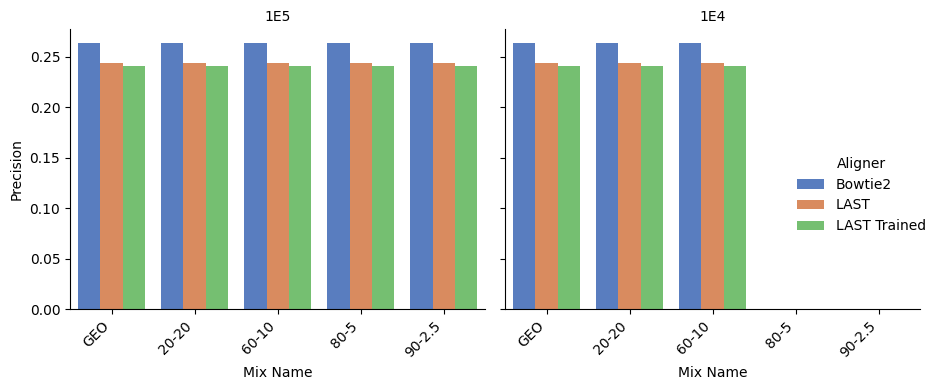

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.catplot(
    data=results, 
    kind="bar", 
    x="Ratio", 
    y="Precision", 
    hue="Aligner", 
    col="Virus titer",
    height=4, 
    aspect=1,
    palette="muted"
)

g.set_axis_labels("Mix Name", "Precision")
g.set_titles("{col_name}")

for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')

# plt.subplots_adjust(top=0.9)
# g.fig.suptitle('Precision of Bowtie2 and LAST on different viral mixes', fontsize=16)

plt.tight_layout()
plt.show()

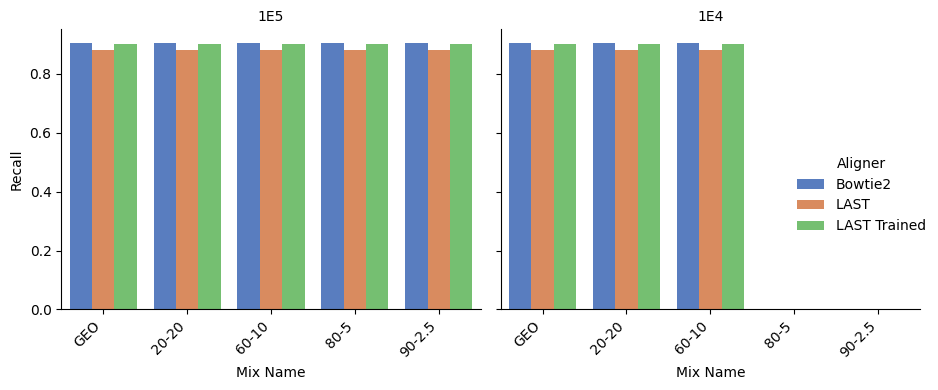

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.catplot(
    data=results, 
    kind="bar", 
    x="Ratio", 
    y="Recall", 
    hue="Aligner", 
    col="Virus titer",
    height=4, 
    aspect=1,
    palette="muted"
)

g.set_axis_labels("Mix Name", "Recall")
g.set_titles("{col_name}")

for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')

# plt.subplots_adjust(top=0.9)
# g.fig.suptitle('Recall of Bowtie2 and LAST on different viral mixes', fontsize=16)

plt.tight_layout()
plt.show()

## Weighted

In [42]:
# Function to calculate metrics
def calculate_weighted_metrics(aligner, ground_truth, predicted_data, join_type="outer"):
    # Merge ground truth and predicted data on GENE and POS
    merged_data = pd.merge(ground_truth, predicted_data, left_index=True, right_index=True, how=join_type)
    merged_data.fillna('-', inplace=True)

    # print(merged_data)
    
    # Initialize counts
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    
    # Iterate through rows
    for index, row in merged_data.iterrows():
        is_nan = True
        expected = [row[col] for col in ground_truth.columns if col != 'ALT']
        if row['ALT'] != '-':
            if row['ALT'] in expected:
                TP += 1
            else:
                FP += 1
        else:
            if expected.count('-') == len(expected):
                TN += 1
            else:
                FN += 1

    # print(f"Aligner: {aligner}")
    # print("TP: " + str(TP))
    # print("TN: " + str(TN))
    # print("FP: " + str(FP))
    # print("FN: " + str(FN))

    # Calculate metrics
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    return [accuracy, precision, recall, f1_score]

### Investigating Variant Calls

In [43]:
# %pip install vcfpy
import vcfpy

# header = ['#CHROM', 'POS', 'REF', 'ALT'] + reader.header.samples.names
def vcf_to_df(vcf_path):
    # Open file, this will read in the header
    reader = vcfpy.Reader.from_path(vcf_path)

    # Initialize an empty list to store rows
    data = []

    # Build header
    header = ['#CHROM', 'QUAL', 'POS', 'REF', 'ALT'] + reader.header.samples.names

    # Iterate through records
    for record in reader:
        if not record.is_snv():
            continue
        line = [record.CHROM, record.QUAL, record.POS, record.REF]
        line += [alt.value for alt in record.ALT]
        line += [call.data.get('GT') or './.' for call in record.calls]
        data.append(line)

    # Create DataFrame
    df = pd.DataFrame(data, columns=header)

    return df

In [44]:
# sample = "mix_11_miseq"
hxb2_bowtie2_vcf_path = f'/Users/kimwilliame/Git/hiv/test_out/variants/MinVarPanel/{sample}_to_subtype_HXB2/paramgroup_1/variants_bowtie2.vcf'
# hxb2_last_vcf_path = f'/Users/kimwilliame/Git/hiv/test_out/variants/MinVarPanel/{sample}_to_subtype_HXB2/paramgroup_1/variants_last.vcf'
hxb2_last_trained_vcf_path = f'/Users/kimwilliame/Git/hiv/test_out/variants/MinVarPanel/{sample}_to_subtype_HXB2/paramgroup_1/variants_last_trained.vcf'

# vcf_to_df(hxb2_bowtie2_vcf_path)

hxb2_bowtie2_vcf = vcf_to_df(hxb2_bowtie2_vcf_path)
# hxb2_last_vcf = vcf_to_df(hxb2_last_vcf_path)
hxb2_last_trained_vcf = vcf_to_df(hxb2_last_trained_vcf_path)

hxb2_bowtie2_vcf

/Users/kimwilliame/miniconda3/envs/bsmscs/lib/python3.8/site-packages/vcfpy/header.py:284: DuplicateHeaderLineWarning: Seen FILTER header more than once: min_indelqual_20, using firstoccurence
  warnings.warn(


,#CHROM,QUAL,POS,REF,ALT
0,K03455.1,49314,1848,A,G
1,K03455.1,12514,1851,A,G
2,K03455.1,2037,1857,C,A
3,K03455.1,2362,1858,G,A
4,K03455.1,49314,1866,G,A
...,...,...,...,...,...
499,K03455.1,60,5436,G,A
500,K03455.1,75,5459,A,G
501,K03455.1,682,5478,A,G
502,K03455.1,518,5504,C,A


[   58.   4983.6  9909.2 14834.8 19760.4 24686.  29611.6 34537.2 39462.8
 44388.4 49314. ]


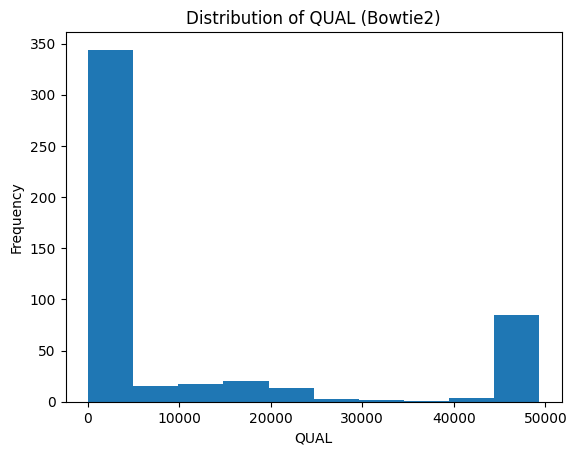

[   58.   4983.6  9909.2 14834.8 19760.4 24686.  29611.6 34537.2 39462.8
 44388.4 49314. ]


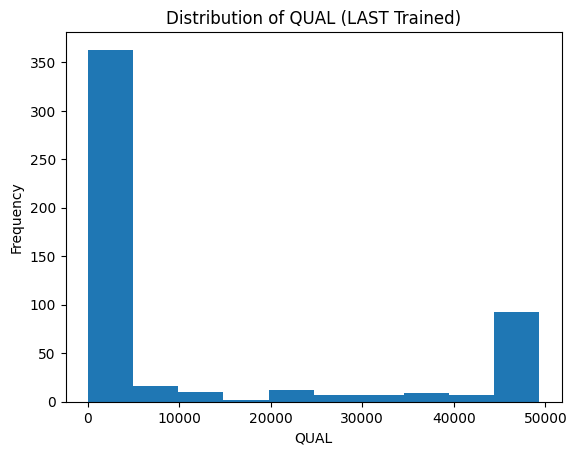

In [45]:
import matplotlib.pyplot as plt

def get_distribution(df, column_name, aligner):
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')  # Convert to numeric, handle non-numeric values as NaN
    
    # Calculate histogram
    counts, edges, _ = plt.hist(df[column_name], bins=10)  # Adjust the number of bins as needed
    
    # Print start and end points of the bins
    print(edges)

    # Customize the plot
    plt.title(f'Distribution of {column_name} ({aligner})')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

get_distribution(hxb2_bowtie2_vcf, 'QUAL', "Bowtie2")
# get_distribution(hxb2_last_vcf, 'QUAL', "LAST")
get_distribution(hxb2_last_trained_vcf, 'QUAL', "LAST Trained")


In [46]:
def batch_run_metrics(aligners, e_qual):
    results = pd.DataFrame(columns=['Aligner', 'QUAL', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    for aligner in aligners:
        for e in e_qual:
            df = pd.read_csv(f"/Users/kimwilliame/Git/hiv/test_out/variants/MinVarPanel/{sample}_to_subtype_HXB2/paramgroup_1/variants_{aligner}_{e}.aavf", sep="\t", index_col=(0,2))
            results.loc[len(results)] = [aligner, e] + list(calculate_metrics(aligner, actual, df, "outer"))
    
    return results

e_qual = [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]
aligners = ['bowtie2', 'last_trained']
# aligners = ['last_trained']

br_results = batch_run_metrics(aligners, e_qual)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/kimwilliame/Git/hiv/test_out/variants/MinVarPanel/mix_19_miseq_to_subtype_HXB2/paramgroup_1/variants_bowtie2_5000.aavf'

In [ ]:
br_results

,Aligner,QUAL,Accuracy,Precision,Recall,F1 Score
0,bowtie2,5000,0.012739,0.020833,0.031746,0.025157
1,bowtie2,10000,0.012739,0.020833,0.031746,0.025157
2,bowtie2,15000,0.019108,0.030928,0.047619,0.037500
3,bowtie2,20000,0.038217,0.060000,0.095238,0.073620
4,bowtie2,25000,0.063694,0.096154,0.158730,0.119760
5,bowtie2,30000,0.076433,0.113208,0.190476,0.142012
6,bowtie2,35000,0.114650,0.160714,0.285714,0.205714
7,bowtie2,40000,0.121019,0.168142,0.301587,0.215909
8,bowtie2,45000,0.127389,0.175439,0.317460,0.225989
9,bowtie2,50000,0.361290,0.378378,0.888889,0.530806


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_precision_recall_curve(results):
    # Sort the DataFrame by 'QUAL'
    results.sort_values(by='QUAL', inplace=True)

    # Create a figure and axis for the plot
    plt.figure(figsize=(8, 6))

    # Iterate over unique aligner labels
    for aligner_label in results['Aligner'].unique():
        aligner_data = results[results['Aligner'] == aligner_label]

        # Plot precision-recall curve for each aligner
        sns.lineplot(x=aligner_data['Recall'], y=aligner_data['Precision'], label=f'{aligner_label}')

    # Customize the plot
    plt.title('Precision-Recall Curve for Different Aligners')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid(True)
    plt.show()


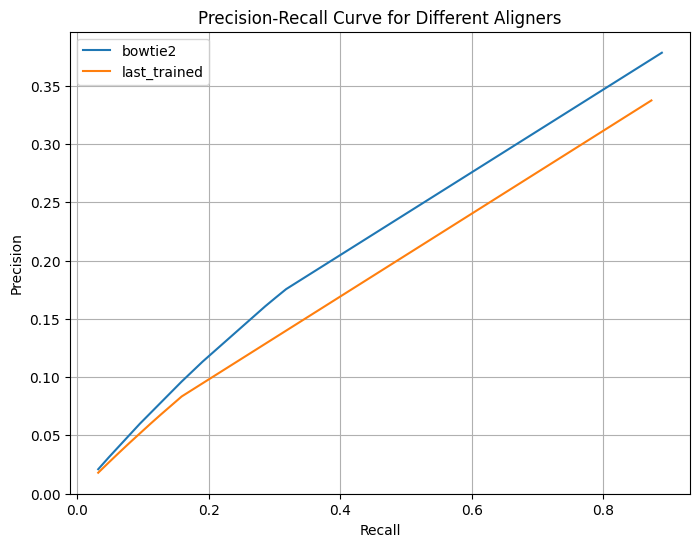

In [ ]:
plot_precision_recall_curve(br_results)

## Subtype B

In [ ]:
subtypeB_bowtie2 = pd.read_csv("/Users/kimwilliame/Git/hiv/test_out/variants/MinVarPanel/mix_11_miseq_to_subtypeB/paramgroup_1/variants_bowtie2.aavf", sep="\t", index_col=(0,2))
subtypeB_last = pd.read_csv("/Users/kimwilliame/Git/hiv/test_out/variants/MinVarPanel/mix_11_miseq_to_subtypeB/paramgroup_1/variants_last.aavf", sep="\t", index_col=(0,2))
subtypeB_last_trained = pd.read_csv("/Users/kimwilliame/Git/hiv/test_out/variants/MinVarPanel/mix_11_miseq_to_subtypeB/paramgroup_1/variants_last_trained.aavf", sep="\t", index_col=(0,2))

subtypeB_bowtie2.drop('REF', axis=1, inplace=True)
subtypeB_last.drop('REF', axis=1, inplace=True)
subtypeB_last_trained.drop('REF', axis=1, inplace=True)

### Comparision of Aligners

In [ ]:
results_new = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Calculate metrics
results_new.loc['Bowtie2'] = calculate_metrics("Bowtie2", actual, subtypeB_bowtie2)
results_new.loc['Last'] = calculate_metrics("LAST", actual, subtypeB_last)
results_new.loc['Last Trained'] = calculate_metrics("LAST Trained", actual, subtypeB_last_trained)

results_new

,Accuracy,Precision,Recall,F1 Score
Bowtie2,0.022727,0.030864,0.079365,0.044444
Last,0.022936,0.031250,0.079365,0.044843
Last Trained,0.026738,0.038760,0.079365,0.052083
